In [1]:
from scipy.special import erfinv
from scipy.special import loggamma
from scipy.stats import gamma
from scipy.stats import nbinom
from scipy import special
import numpy as np
import sys
import math
import pandas as pd
import seaborn as sns
from matplotlib import colors as mcolors
from matplotlib import cm as cm
import random
from scipy.ndimage import laplace
from scipy.ndimage import gaussian_filter
from scipy.special import binom
import inspect
from scipy import stats
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d

In [2]:
# load data
data = pd.read_csv("../theory/old_files/results/spatial_integrals_dim2.csv")
data_pr = pd.read_csv("../theory/old_files/results/cleaned_data_dim2_errorFalse.csv")
data_pr = data_pr.loc[data_pr['poly_type'] == '1_1']

sigma_vals = data['w'].tolist()
omega_vals = data['w'].tolist()
kappa_list = data['u2_GQ'].tolist()
res_vals = data_pr['residues']
pole_vals = data_pr['poles']

In [3]:
colors = sns.color_palette("colorblind", 8)
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams.update({'font.sans-serif': 'Arial'})
plt.rcParams.update({'figure.figsize': '10,8'})
plt.rcParams.update({'lines.linewidth': 4})
plt.rcParams.update({'lines.markersize': 12})

In [42]:
res_vals

4        -1.858354
10       -1.885458
16       -1.913065
22       -1.941466
28       -1.970425
          ...     
574    -956.551863
580   -1138.359973
586   -1361.937113
592   -1633.574548
598   -2040.938290
Name: residues, Length: 100, dtype: float64

In [43]:
residues(1,omega_vals,res_vals)

array(5.69745263)

In [44]:
get_thetae(1,0.1,omega_vals,res_vals)

3.7810565330488033


0.0011956750606293936

In [39]:
# old functions
def poles(w,w_vals,pole_vals):
    f=interp1d(w_vals,pole_vals,fill_value="extrapolate")
    return(f(w))

def residues(w,w_vals, res_vals):
    res_vals=[-1*x for x in res_vals]
    f = interp1d(w_vals,res_vals,fill_value="extrapolate")
    return (f(w))

def get_gammae(w,s,w_vals,pole_vals,N=10000,D=1,d=1):
    l_c=np.sqrt(D/s)
    return(s*N*(l_c**d)*poles(w/l_c,w_vals,pole_vals))

def get_thetae(w,s,w_vals,res_vals,mu=1e-8,N=10000,D=1,d=1):
    l_c = np.sqrt(D / s)
#     print(residues(w/l_c,w_vals,res_vals))
    return(mu*N*(l_c**d)*residues(w/l_c,w_vals,res_vals))

# def rate_p(w,s,w_vals,pole_vals,N=10000,D=1,d=1):
#     l_c=np.sqrt(D/s)
#     return(s*N*(l_c**d)*poles(w/l_c,w_vals,pole_vals))

# def shape_p(w,s,w_vals,res_vals,mu=1e-8,N=10000,D=1,d=1):
#     l_c = np.sqrt(D / s)
#     return(mu*N*(l_c**d)*residues(w/l_c,w_vals,res_vals))
## functions

# def finite_sfs_k(n,k,sigma,s,sigma_vals,pole_vals,res_vals,mu=1e-7,N=100,D=1,d=2):
#     beta = rate_p(sigma,s,sigma_vals,pole_vals,N,D,d)
#     alpha = shape_p(sigma,s,sigma_vals,res_vals,mu,N,D,d)
#     logval = k*np.log(n)+alpha*np.log(beta)-(k+alpha)*np.log(n+beta)+loggamma(k+alpha)-loggamma(k+1)-loggamma(alpha)
#     return(np.e**logval)

# def power(zs, sigma, s, sigma_vals, res_vals, pole_vals, Nval=10000):
#     beta = rate_p(sigma,s,sigma_vals,pole_vals,N=Nval)
#     alpha = shape_p(sigma,s,sigma_vals,res_vals,N=Nval)
#     #return(1-gamma.cdf(zs,a=alpha,scale=1/beta))
#     return(gamma.sf(zs,a=alpha,scale=1/beta))

# def calc_V_G(sigma,kappa_list,sigma_vals,s,beta,L=1e6,mu=1e-8,d=2,D=1,N=10000):
#     f = interp1d(sigma_vals,kappa_list,fill_value="extrapolate")
#     kappa_val = f(sigma)
#     VG_val = (2*L*mu*kappa_val*(beta**2))/(s**2*(np.sqrt(D/s)**d)*N)
#     return VG_val

# def calc_V_E(sigma,sigma2R,sigma2G,l=1,d=2):
#     coef=1-1/((1+2*(sigma/l)**2)**(d/2))
#     return(sigma2R+coef*sigma2G)

def get_zs(s,beta,Vp,n,a=1e-8):
    vs = 2*erfinv(1-a)**2
    return(0.5 - (0.5)*math.sqrt(1-(2*vs*(Vp/n))/((beta)**2)))

# def power_all(sigma,s,sigma_vals,kappa_list,
#               res_vals,pole_vals,
#               sigma2R=0.5,sigma2G=0.5,Nval=10000,n=1e6,a=1e-8,L=1e6,mu=1e-8,d=2,D=1,l=1,beta=1.0):
#     lc = np.sqrt(D/s)
#     Vg=calc_V_G(sigma/lc,kappa_list,sigma_vals,s,beta,N=Nval,L=L,mu=mu,d=d,D=D)#[sigma_vals.index(sigma)]
#     Ve=calc_V_E(sigma/lc,sigma2R,sigma2G,l,d)
#     Vp=Vg+Ve
#     zs=get_zs(s,beta,Vp=Vp,n=n,a=a)
#     power_val = power(zs,sigma,s,sigma_vals,res_vals,pole_vals,Nval)
#     return(power_val)

# def burden_ncp(s,sigma,sigma_vals,pole_vals,res_vals,
#                gamma=2,prop_cases=0.5,num_snps=100,num_assoc=100,N=1000,D=1,d=2,mu=1e-8,n=1e6):
#     # add later - num_assoc<=num_snps check
#     # get rate and shape params
#     rate = rate_p(sigma,s,sigma_vals,pole_vals,N=N,D=D,d=d)
#     shape = shape_p(sigma,s,sigma_vals,res_vals,mu=mu,N=N,D=D,d=d)
#     # calc mean and variance
#     r = shape
#     p = rate/(rate+n)
#     # return ncp
#     num_cases = math.floor(prop_cases*n) # round to integer
#     num_controls = n-num_cases
#     mean = r*(1-p)/p
#     var = r*(1-p)/(p**2)#mean/p
#     ncp = np.sqrt((2*num_cases*num_controls)/(num_cases+num_controls))*(num_assoc/np.sqrt(num_snps))*(mean/(np.sqrt(var+mean-mean**2)))*(gamma-1)
#     return ncp

# def power_from_ncp(ncp,alpha,df=1):
#     power = 1 - stats.ncx2.cdf(stats.chi2.ppf(1 - alpha, df=1), df=1, nc=ncp)
#     return power

# def power_all_burden(sigma,s,sigma_vals,
#               res_vals,pole_vals,gamma=2,prop_cases=0.1,num_snps=100,num_assoc=100,
#              N=10000,n=1e4,mu=1e-8,d=2,D=1,alpha=5e-8,df=1):
#     ncp_temp = burden_ncp(s,sigma,sigma_vals,pole_vals,res_vals,gamma=gamma,prop_cases=prop_cases,
#                          num_snps=num_snps,num_assoc=num_assoc,N=N,n=n,mu=mu,d=d,D=D)
#     power_temp = power_from_ncp(ncp_temp,alpha,df)
#     return power_temp

In [53]:
def get_vg(beta,L,n,omega,s,omega_vals,pole_vals,res_vals,mu=1e-8,N=100,D=1,d=2):
    # function to calculate genetic variance
    gamma = rate_p(omega,s,omega_vals,pole_vals,N,D,d)
    theta = shape_p(omega,s,omega_vals,res_vals,mu,N,D,d)
    var_x = theta*(gamma+n)/(n*gamma**2)
    return var_x*(beta**2)*L
    
def finite_sfs_k(n,k,omega,s,omega_vals,pole_vals,res_vals,mu=1e-8,N=100,D=1,d=2):
    beta = rate_p(omega,s,omega_vals,pole_vals,N,D,d)
    alpha = shape_p(omega,s,omega_vals,res_vals,mu,N,D,d)
    logval = k*np.log(n)+alpha*np.log(beta)-(k+alpha)*np.log(n+beta)+loggamma(k+alpha)-loggamma(k+1)-loggamma(alpha)
    return(np.e**logval)

def get_etaell(beta,L,n,omega,s,omega_vals,pole_vals,res_vals,mu=1e-8,N=100,D=1,d=2,Ve=0.1):
    # function to calculate GWAS power
    gamma = rate_p(omega,s,omega_vals,pole_vals,N,D,d)
    theta = shape_p(omega,s,omega_vals,res_vals,mu,N,D,d)
#     Vg = get_vg(beta,L,n,omega,s,omega_vals,pole_vals,res_vals)
    Vp = 1#Vg+Ve
    xstar = get_zs(s,beta,Vp,n,a=1e-8)
    upper_lim = math.floor(n*xstar)
    sum_total = 0
    for i in range(upper_lim+1):
        sum_total+=finite_sfs_k(n,i,omega,s,omega_vals,pole_vals,res_vals)
    return 1 - sum_total

def burden_ncp(s,omega,omega_vals,pole_vals,res_vals,
               gamma=2,prop_cases=0.5,num_snps=100,num_assoc=100,N=1000,D=1,d=2,mu=1e-8,n=1e6):
    # add later - num_assoc<=num_snps check
    # get rate and shape params
    rate = get_gammae(omega,s,omega_vals,pole_vals,N=N,D=D,d=d)
    shape = get_thetae(omega,s,omega_vals,res_vals,mu=mu,N=N,D=D,d=d)
    # calc mean and variance
    r = shape
    p = rate/(rate+n)
    # return ncp
    num_cases = math.floor(prop_cases*n) # round to integer
    num_controls = n-num_cases
    mean = r*(1-p)/p
    var = r*(1-p)/(p**2)#mean/p
    ncp = np.sqrt((2*num_cases*num_controls)/(num_cases+num_controls))*(num_assoc/np.sqrt(num_snps))*(mean/(np.sqrt(var+mean-mean**2)))*(gamma-1)
    return ncp


def power_from_ncp(ncp,alpha,df=1):
    power = 1 - stats.ncx2.cdf(stats.chi2.ppf(1 - alpha, df=1), df=1, nc=ncp)
    return power

def power_all_burden(omega,s,omega_vals,
              res_vals,pole_vals,gamma=2,prop_cases=0.1,num_snps=100,num_assoc=100,
             N=10000,n=1e4,mu=1e-8,d=2,D=1,alpha=5e-8,df=1):
    ncp_temp = burden_ncp(s,omega,omega_vals,pole_vals,res_vals,gamma=gamma,prop_cases=prop_cases,
                         num_snps=num_snps,num_assoc=num_assoc,N=N,n=n,mu=mu,d=d,D=D)
    power_temp = power_from_ncp(ncp_temp,alpha,df)
    return power_temp


In [6]:

omega_range = np.logspace(-1,2,100)


<ipython-input-12-059826d5f103>:55: RuntimeWarning: divide by zero encountered in double_scalars
  axs[1][0].loglog(b_list_2,[get_etaell(b_temp,L,n,w1,s1,omega_vals,pole_vals,res_vals,Ve=0.5)/get_etaell(b_temp,L,n,w2,s1,omega_vals,pole_vals,res_vals,Ve=0.5) for b_temp in b_list_2],
<ipython-input-12-059826d5f103>:67: RuntimeWarning: divide by zero encountered in double_scalars
  axs[1][1].loglog(b_list_2,[get_etaell(b_temp,L,n,w1,s2,omega_vals,pole_vals,res_vals,Ve=0.5)/get_etaell(b_temp,L,n,w2,s2,omega_vals,pole_vals,res_vals,Ve=0.5) for b_temp in b_list_2],


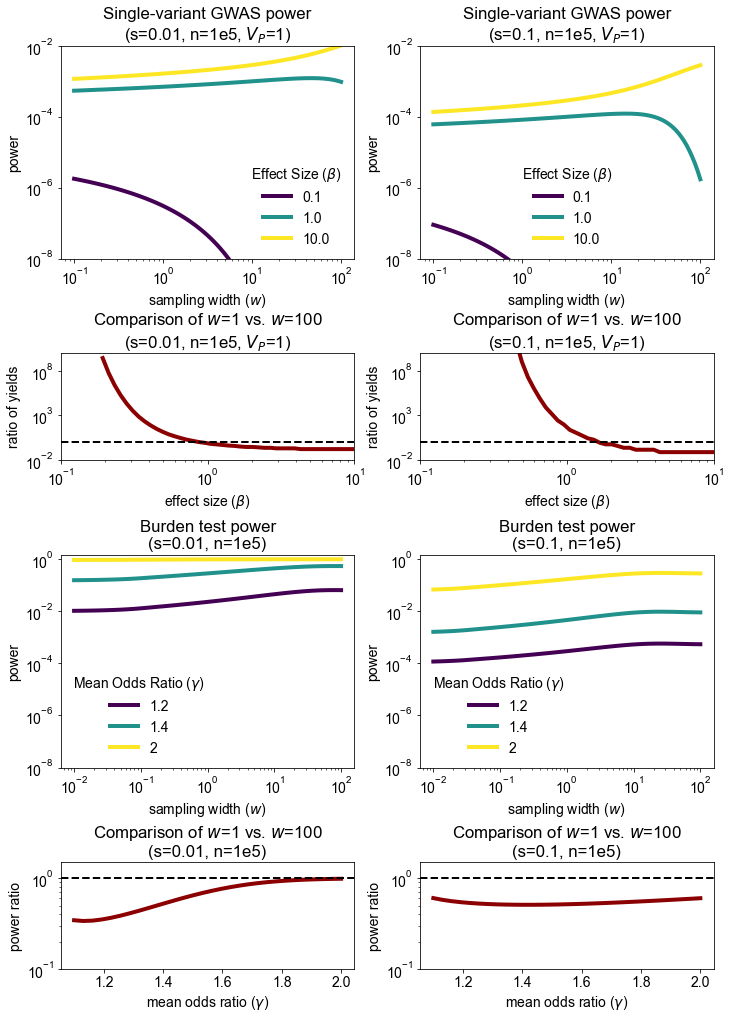

In [12]:
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator
from matplotlib import gridspec
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.size'] = 14
fig = plt.figure(figsize=(10, 14))
gs = gridspec.GridSpec(4, 2, height_ratios=[2, 1, 2,1 ])  

axs = [
    [fig.add_subplot(gs[0, j]) for j in range(2)],
    [fig.add_subplot(gs[1, j]) for j in range(2)],
    [fig.add_subplot(gs[2, j]) for j in range(2)],
    [fig.add_subplot(gs[3, j]) for j in range(2)]
]


num_b=3

b_list = np.logspace(-1,1,num_b)
colors = plt.cm.viridis(np.linspace(0,1,num_b))

L = 1000
n = 100000
s1 = 0.01
s2 = 0.1

w1 = 1
w2 = 100

# top left

for i in range(num_b):
    axs[0][0].loglog(omega_range,[get_etaell(b_list[i],L,n,w,s1,omega_vals,pole_vals,res_vals,Ve=0.5) for w in omega_range],color=colors[i],label=str(round(b_list[i],2)))

axs[0][0].legend(title=r"Effect Size ($\beta$)",frameon=False,title_fontsize=14)
axs[0][0].set_xlabel(r"sampling width ($w$)")
axs[0][0].set_ylabel("power")
axs[0][0].set_title("Single-variant GWAS power\n(s="+str(s1)+r", n=1e5, $V_P$=1)")
axs[0][0].set_ylim(1e-8,1e-2)
    
# top right

for i in range(num_b):
    axs[0][1].loglog(omega_range,[get_etaell(b_list[i],L,n,w,s2,omega_vals,pole_vals,res_vals,Ve=0.5) for w in omega_range],color=colors[i],label=str(round(b_list[i],2)))

axs[0][1].legend(title=r"Effect Size ($\beta$)",frameon=False,title_fontsize=14)
axs[0][1].set_xlabel(r"sampling width ($w$)")
axs[0][1].set_ylabel("power")
axs[0][1].set_title("Single-variant GWAS power\n(s="+str(s2)+r", n=1e5, $V_P$=1)")
axs[0][1].set_ylim(1e-8,1e-2)
    
# 2nd row left

b_list_2 = np.logspace(-1,1,50)
axs[1][0].loglog(b_list_2,[get_etaell(b_temp,L,n,w1,s1,omega_vals,pole_vals,res_vals,Ve=0.5)/get_etaell(b_temp,L,n,w2,s1,omega_vals,pole_vals,res_vals,Ve=0.5) for b_temp in b_list_2],
                color='darkred')
axs[1][0].axhline(y=1, color='black', linestyle='--',linewidth=2)
axs[1][0].set_ylim(1e-2,1e10)
axs[1][0].set_xlim(1e-1,1e1)
locator = LogLocator(numticks=2)
axs[1][0].set_xlabel(r"effect size ($\beta$)")
axs[1][0].set_ylabel("ratio of yields")# of yields (narrow/broad)")
axs[1][0].set_title("Comparison of $w$="+str(w1)+r" vs. $w$="+str(w2)+"\n(s="+str(s1)+r", n=1e5, $V_P$=1)")

# 2nd row right

axs[1][1].loglog(b_list_2,[get_etaell(b_temp,L,n,w1,s2,omega_vals,pole_vals,res_vals,Ve=0.5)/get_etaell(b_temp,L,n,w2,s2,omega_vals,pole_vals,res_vals,Ve=0.5) for b_temp in b_list_2],
                color='darkred')
axs[1][1].axhline(y=1, color='black', linestyle='--',linewidth=2)  
axs[1][1].set_ylim(1e-2,1e10)
axs[1][1].set_xlim(1e-1,1e1)
axs[1][1].set_xlabel(r"effect size ($\beta$)")
axs[1][1].set_ylabel("ratio of yields")# of yields (narrow/broad)")
axs[1][1].set_title("Comparison of $w$="+str(w1)+r" vs. $w$="+str(w2)+"\n(s="+str(s2)+r", n=1e5, $V_P$=1)")

# 3rd row left

ccratio=1e-3
g_list = [1.2,1.4,2]
g_list_2 = np.linspace(1.1,2,30)

for i in range(num_b):
    axs[2][0].loglog(omega_vals,[power_all_burden(w, s1, omega_vals, res_vals, pole_vals, prop_cases=ccratio, gamma=g_list[i],n=n,num_snps=L,num_assoc=L)
                for w in omega_vals],color=colors[i],label=str(round(g_list[i],2)))

axs[2][0].set_xlabel(r"sampling width ($w$)")
axs[2][0].set_ylabel(r"power")
axs[2][0].set_title("Burden test power\n(s="+str(s1)+", n=1e5)")
axs[2][0].set_ylim(1e-8,1.5)
axs[2][0].legend(title=r"Mean Odds Ratio ($\gamma$)",frameon=False,title_fontsize=14)

# 3rd row right


for i in range(num_b):
    axs[2][1].loglog(omega_vals,[power_all_burden(w, s2, omega_vals, res_vals, pole_vals, prop_cases=ccratio, gamma=g_list[i],n=n,num_snps=L,num_assoc=L)
                for w in omega_vals],color=colors[i],label=str(round(g_list[i],2)))

axs[2][1].legend(title=r"Mean Odds Ratio ($\gamma$)",frameon=False,title_fontsize=14)
axs[2][1].set_xlabel(r"sampling width ($w$)")
axs[2][1].set_ylabel(r"power")
axs[2][1].set_title("Burden test power\n(s="+str(s2)+", n=1e5)")
axs[2][1].set_ylim(1e-8,1.5)    
   
    
# bottom left
axs[3][0].plot(g_list_2,[power_all_burden(w1, s1, omega_vals, res_vals, pole_vals, prop_cases=ccratio, gamma=gt,n=n,num_snps=L,num_assoc=L)/
                           power_all_burden(w2, s1, omega_vals, res_vals, pole_vals, prop_cases=ccratio, gamma=gt,n=n,num_snps=L,num_assoc=L) for gt in g_list_2],
              color='darkred')
axs[3][0].set_yscale('log')
axs[3][0].axhline(y=1, color='black', linestyle='--',linewidth=2)
axs[3][0].set_ylim(1e-1,1.5)
axs[3][0].set_title("Comparison of $w$="+str(w1)+r" vs. $w$="+str(w2)+"\n(s="+str(s1)+r", n=1e5)")
axs[3][0].set_ylabel("power ratio")
axs[3][0].set_xlabel(r"mean odds ratio ($\gamma$)")

# bottom right
axs[3][1].plot(g_list_2,[power_all_burden(w1, s2, omega_vals, res_vals, pole_vals, prop_cases=ccratio, gamma=gt,n=n,num_snps=L,num_assoc=L)/
                           power_all_burden(w2, s2, omega_vals, res_vals, pole_vals, prop_cases=ccratio, gamma=gt,n=n,num_snps=L,num_assoc=L) for gt in g_list_2],
              color='darkred')
axs[3][1].set_yscale('log')
axs[3][1].axhline(y=1, color='black', linestyle='--',linewidth=2)
axs[3][1].set_ylim(1e-1,1.5)
axs[3][1].set_title("Comparison of $w$="+str(w1)+r" vs. $w$="+str(w2)+"\n(s="+str(s2)+r", n=1e5)")
axs[3][1].set_ylabel("power ratio")
axs[3][1].set_xlabel(r"mean odds ratio ($\gamma$)")


plt.tight_layout(pad=0.1)
plt.savefig("power_fig_ashg.pdf")


# plt.show()
#